In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# Método das Penalidades Interior

## Definição do Problema Unidimensional

Seja o problema de otimização restrito:

\begin{align}
    x^* = \argmin~&f(x) = x \\
    \mathrm{sujeito~a}:~& g(x) : -x + 3 \le 0
\end{align}

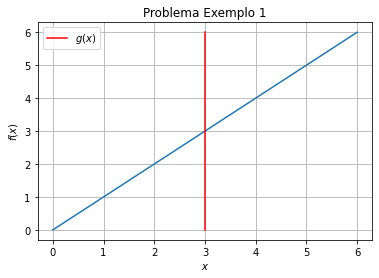

In [2]:
# Definição da malha de pontos
x = np.linspace(0, 6)

# Calcula f(x) e exibe gráfico de contorno
f = x
plt.plot(x, f)

# Exibe g(x)
x= 3*np.ones(x.size)
g = np.linspace(np.amin(f), np.amax(f))
plt.plot(x, g, 'r', label=r'$g(x)$')

# Outros parâmetros da figura
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Problema Exemplo 1')
plt.legend()
plt.grid()
plt.show()

## Aplicação do método

Aplicando o Método das Penalidades Interior, nós passaremos a resolver o seguinte problema equivalente:

\begin{equation}
    x^* = \argmin~\hat{f}(x) = x - u\frac{1}{-x+3}
\end{equation}

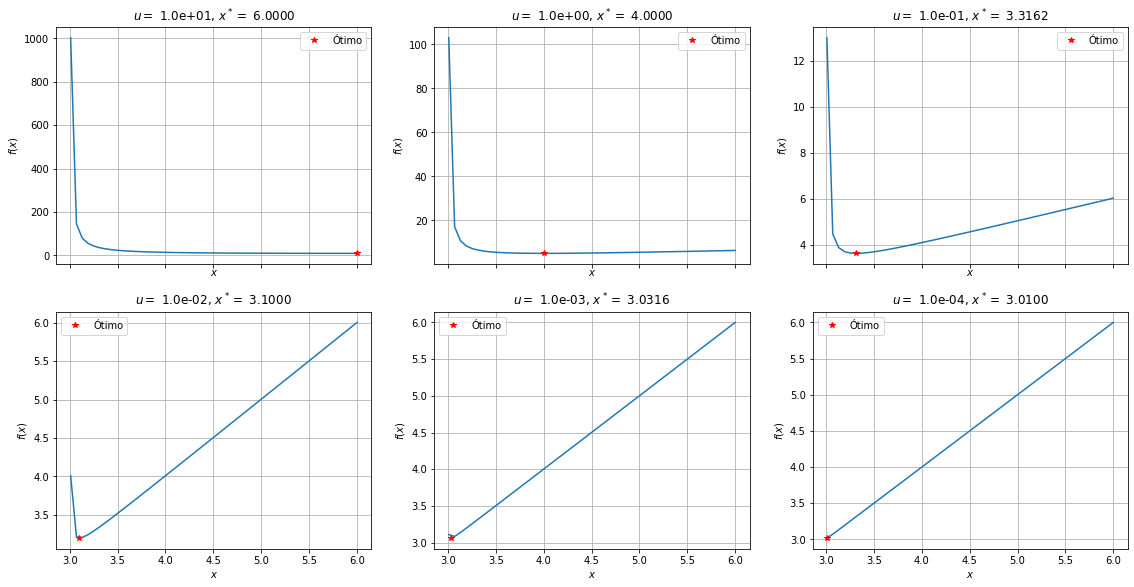

In [3]:
# Nova definição da malha de pontos
x = np.linspace(3.01, 6)

# Intervalo de valores de u
u = np.array([1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4])

# Criação da figura
nrows = int(np.sqrt(u.size))
ncols = int(np.ceil(u.size/nrows))
fig, axis = plt.subplots(ncols=ncols, nrows=nrows,
                         sharex=True, sharey=False,
                         figsize=[ncols*6.4, nrows*4.8])
axis = axis.flatten()

# Para cada valor de u
for n in range(u.size):
    
    # Define a nova função-objetivo
    def fh(x):
        return x + u[n]/(x-3)
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize_scalar(fh, method='bounded', bounds=(3.0+1e-8, 6))
    xopt = solution.x
    fopt = solution.fun
    
    # Calcula curva para fins de figura
    y = fh(x)

    # Exibe figura
    axis[n].plot(x, y)
    axis[n].plot(xopt, fopt, '*r', label='Ótimo')
    axis[n].set_xlabel(r'$x$')
    axis[n].set_ylabel(r'$f(x)$')
    axis[n].set_title(r'$u = $ %.1e, ' % u[n] + r'$x^* =$ %.4f' % xopt)
    axis[n].grid()
    axis[n].legend()

plt.show()

## Algoritmo Geral

In [4]:
# Parâmetros
precisao = 1e-4 # Precisão: percentual de diferença de x entre duas gerações
u = 1. # Valor inicial de u
alpha = 1.5 # Aceleração do valor de u
xlast = np.inf # Último valor de u
iteracoes = 1 # Contador de iterações

while True:
    
    # Define nova função-objetivo
    def fh(x):
        return x + u/(x-3)
    
    # Determina o ótimo
    solution = optimize.minimize_scalar(fh, method='bounded', bounds=(3.0+1e-8, 6))
    xopt = solution.x
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.abs((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, diminua u
    else:
        xlast = xopt
        u = u/alpha
        iteracoes += 1

# Exibe resultado
print('RESULTADO')
print('x-ótimo: %.5f' % xopt)
print('Valor final de u: %.1e' % u)
print('Número de iterações: %d' % iteracoes)

RESULTADO
x-ótimo: 3.00124
Valor final de u: 1.5e-06
Número de iterações: 34


## Definição do Problema Bidimensional

Seja o problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \argmin &~f(\mathbf{x}) = (x_1-5)^2 + (x_2-6)^2 \\
    \mathrm{sujeito~a:} &~ g(\mathbf{x}): x_1 - 2 \le 0
\end{align}

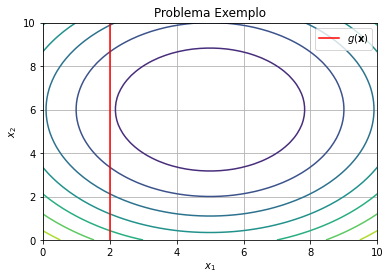

In [5]:
# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(0, 10),
                     np.linspace(0, 10))

# Calcula f(x) e exibe gráfico de contorno
f = (x1-5)**2 + (x2-6)**2
plt.contour(x1, x2, f)

# Calcula h e exibe restrição
x1 = 2*np.ones(2)
g = np.linspace(np.amin(x2[:, 0]), np.amax(x2[:, 0]), x1.size)
plt.plot(x1, g, 'r', label=r'$g(\mathbf{x})$')

# Outros parâmetros da figura
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()

## Aplicação do método

Aplicando o Método das Penalidades Interior, nós passaremos a resolver o seguinte problema equivalente:

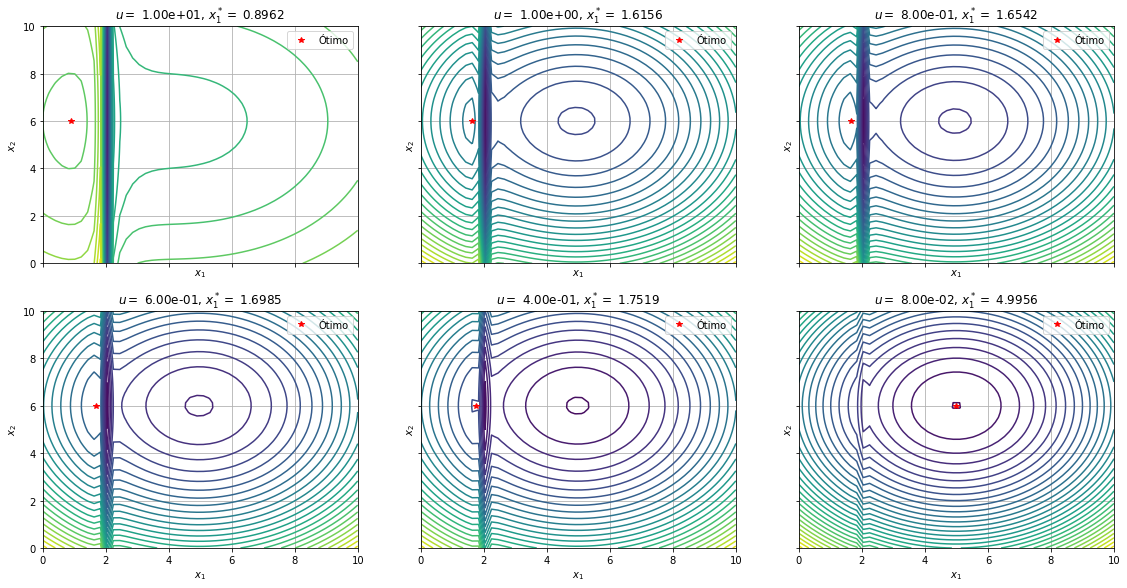

In [6]:
# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(0, 10),
                     np.linspace(0, 10))

# Intervalo de valores de u
u = np.array([1e1, 1e0, 8e-1, 6e-1, 4e-1, 8e-2])

# Criação da figura
nrows = int(np.sqrt(u.size))
ncols = int(np.ceil(u.size/nrows))
fig, axis = plt.subplots(ncols=ncols, nrows=nrows,
                         sharex=True, sharey=True,
                         figsize=[ncols*6.4, nrows*4.8])
axis = axis.flatten()

# Para cada valor de u
for n in range(u.size):
    
    # Define a nova função-objetivo
    def fh(vars):
        x1, x2 = vars[0], vars[1]
        return (x1-5)**2 + (x2-6)**2 - u[n]/(x1-2)
    
    # Ponto inicial
    x0 = np.array([0, 0], dtype=float)
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, x0, method='Nelder-Mead')
    xopt = solution.x
    fopt = solution.fun
    
    # Calcula curva para fins de figura
    y = (x1-5)**2 + (x2-6)**2 - u[n]/(x1-2)

    # Exibe figura
    axis[n].contour(x1, x2, y, levels=30)
    axis[n].plot(xopt[0], xopt[1], '*r', label='Ótimo')
    axis[n].set_xlabel(r'$x_1$')
    axis[n].set_ylabel(r'$x_2$')
    axis[n].set_title(r'$u = $ %.2e, ' % u[n] + r'$x_1^* =$ %.4f' % xopt[0])
    axis[n].grid()
    axis[n].legend()

plt.show()

## Algoritmo Geral

In [9]:
# Parâmetros
precisao = 0.5e-2 # Precisão: percentual de diferença de x entre duas gerações
u = 1. # Valor inicial de u
alpha = .9 # Aceleração do valor de u
xlast = np.array([np.inf, np.inf]) # Último valor de u
iteracoes = 1 # Contador de iterações

while True:
    
    # Define a nova função-objetivo
    def fh(vars):
        x1, x2 = vars[0], vars[1]
        return (x1-5)**2 + (x2-6)**2 - u/(x1-2)
    
    # Ponto inicial
    x0 = np.array([0, 0], dtype=float)
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, x0, method='Nelder-Mead')
    xopt = solution.x
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.linalg.norm((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = xopt
        u = alpha*u
        iteracoes += 1

# Exibe resultado
print('RESULTADO')
print('x-ótimo: ' + str(xopt))
print('Valor final de u: %.1e' % u)
print('Número de iterações: %d' % iteracoes)

RESULTADO
x-ótimo: [4.99068998 5.99996601]
Valor final de u: 1.7e-01
Número de iterações: 18


<ipython-input-9-5e125a786f58>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (x1-5)**2 + (x2-6)**2 - u/(x1-2)
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
